# Quantum Group - Data Assignment - Srimukessh Subramanian

### Import necessary libraries

In [990]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [991]:
who_data = pd.read_csv("who_suicide_statistics_modified3.csv")
who_data.head() #Displays the first 5 rows of the dataset

,country,year,sex,age,suicides_no,population,HDI for year,gdp_for_year ($)
0,Albania,1987,male,15-24 years,21,312900,NaN,"2,156,624,900"
1,Albania,1987,male,35-54 years,16,308000,NaN,"2,156,624,900"
2,Albania,1987,female,15-24 years,14,289700,NaN,"2,156,624,900"
3,Albania,1987,male,75+ years,1,21800,NaN,"2,156,624,900"
4,Albania,1987,male,25-34 years,9,274300,NaN,"2,156,624,900"


Basically the dataset has suicide data for all age categories from 5 to people over 75 for over 101 countries

HDI is a measure of human physical and educational well-being. It is essentially the statistic composite index of life expectancy, education, and per capita income indicators

## 1. List all countries

To list all the unique entries in the 'country' column, the 'unique' method of the Pandas object is used

In [992]:
countries_list = who_data['country']
pd.unique(countries_list) # Returns unique values of country column.

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

## 2. Listing Problems with data

Problems with the dataset of data:

1. Missing values for No of suicides and HDI index
2. Last few rows of the data set are duplicates of existing rows
3. The datatypes of the columns representing 'No of suicides' and 'gdp_for_year' are currently strings. They must be integers
4. Data is not thorough for all age groups for some countries Eg. Thailand in 2016

#### Problem 1 - Missing Suicide Number and HDI Index

<AxesSubplot:>

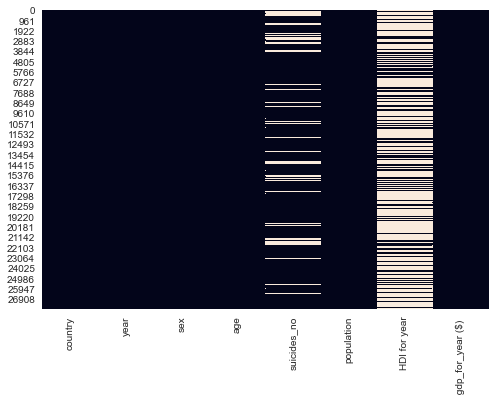

In [993]:
sns.heatmap(who_data.isnull(),cbar=False)

In this heatmap plot, the white lines represent the missing values. It can be seen that the HDI index calculated a yearly-basis has a lot of missing values. Number of Suicides are also found to be missing for a few rows in the dataset.

#### Problem 2 and 4 

In [995]:
who_data.loc[(who_data['country']=='Thailand') &(who_data['year']==2016)]

,country,year,sex,age,suicides_no,population,HDI for year,gdp_for_year ($)
25302,Thailand,2016,male,55-74 years,734,5203957,NaN,"411,755,164,833"
25303,Thailand,2016,male,35-54 years,1421,10084647,NaN,"411,755,164,833"
25304,Thailand,2016,male,75+ years,152,1124052,NaN,"411,755,164,833"
25305,Thailand,2016,male,25-34 years,646,4796355,NaN,"411,755,164,833"
25306,Thailand,2016,male,15-24 years,322,4736305,NaN,"411,755,164,833"
25307,Thailand,2016,female,75+ years,69,1589015,NaN,"411,755,164,833"
25308,Thailand,2016,female,55-74 years,222,6049756,NaN,"411,755,164,833"
25309,Thailand,2016,female,35-54 years,375,10629684,NaN,"411,755,164,833"
25310,Thailand,2016,female,25-34 years,116,4702656,NaN,"411,755,164,833"
25311,Thailand,2016,female,15-24 years,6,4525574,NaN,"411,755,164,833"


The above dataframe shows the suicide data for Thailand in the 2016. 
1. Male 75+ years has been duplicated.
2. Data for 5-14 years is missing

#### Problem 3 - change the datatype of 'year' column

In [996]:
who_data['suicides_no'].dtypes

dtype('O')

The output shows that column representing 'Number of suicides' is of the '(Python) objects' type.
This column also contains the value 'Null' and 'Unknown'

The following code converts it to integer by:

1. Replace 'Null' and 'Unknown' values with 0
2. Repalce NaN with 0
3. Convert it to integer datatype

In [997]:
who_data['suicides_no'] = who_data['suicides_no'].replace(['Null','Unknown'],'0').fillna(0).astype('int64')
who_data['suicides_no']
# who_data['suicides_no'].dtypes

0         21
1         16
2         14
3          1
4          9
        ... 
27835      6
27836    152
27837     21
27838      0
27839      7
Name: suicides_no, Length: 27840, dtype: int64

#### Problem 3 - change the datatype of 'GDP for a year' column

In [998]:
who_data[' gdp_for_year ($) '].dtypes

dtype('O')

In [999]:
who_data.head()

,country,year,sex,age,suicides_no,population,HDI for year,gdp_for_year ($)
0,Albania,1987,male,15-24 years,21,312900,NaN,"2,156,624,900"
1,Albania,1987,male,35-54 years,16,308000,NaN,"2,156,624,900"
2,Albania,1987,female,15-24 years,14,289700,NaN,"2,156,624,900"
3,Albania,1987,male,75+ years,1,21800,NaN,"2,156,624,900"
4,Albania,1987,male,25-34 years,9,274300,NaN,"2,156,624,900"


It is observed the datatype of ' gdp_for_year ($) ' is an object. This must be converted to integer for easier manipulation in our future computations. The following function 'commastrtoint' does the job by removing the commas and converting to an integer datatype

In [1000]:
def commastrtoint(str1):
    str2 = str1.replace(',', '')
    
    return int(str2)

The 'apply' method is used to apply the transformation across the entire column as seen below:

In [1001]:
who_data[' gdp_for_year ($) ']= who_data[' gdp_for_year ($) '].apply(lambda x: commastrtoint(x))

In [1002]:
who_data.head()

,country,year,sex,age,suicides_no,population,HDI for year,gdp_for_year ($)
0,Albania,1987,male,15-24 years,21,312900,NaN,2156624900
1,Albania,1987,male,35-54 years,16,308000,NaN,2156624900
2,Albania,1987,female,15-24 years,14,289700,NaN,2156624900
3,Albania,1987,male,75+ years,1,21800,NaN,2156624900
4,Albania,1987,male,25-34 years,9,274300,NaN,2156624900


### 3. Cleaning and Standardizing data

Note: Some Cleaning/Standardizing has been done in the previous steps

#### Dropping/Deleting the duplicates

In [1003]:
who_data.drop_duplicates(inplace = True) # Drops duplicate rows
who_data

,country,year,sex,age,suicides_no,population,HDI for year,gdp_for_year ($)
0,Albania,1987,male,15-24 years,21,312900,NaN,2156624900
1,Albania,1987,male,35-54 years,16,308000,NaN,2156624900
2,Albania,1987,female,15-24 years,14,289700,NaN,2156624900
3,Albania,1987,male,75+ years,1,21800,NaN,2156624900
4,Albania,1987,male,25-34 years,9,274300,NaN,2156624900
...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,17,3620833,0.675,63067077179
27816,Uzbekistan,2014,female,75+ years,9,348465,0.675,63067077179
27817,Uzbekistan,2014,male,5-14 years,6,2762158,0.675,63067077179
27818,Uzbekistan,2014,female,5-14 years,44,2631600,0.675,63067077179


It can be seen this resulted in 20 rows being dropped (total rows down from 27840 to 27820)

#### Replacing NaN values with 0.0 in HDI for year

In [1004]:
who_data['HDI for year'] = who_data['HDI for year'].fillna(0)
who_data.head()

,country,year,sex,age,suicides_no,population,HDI for year,gdp_for_year ($)
0,Albania,1987,male,15-24 years,21,312900,0.0,2156624900
1,Albania,1987,male,35-54 years,16,308000,0.0,2156624900
2,Albania,1987,female,15-24 years,14,289700,0.0,2156624900
3,Albania,1987,male,75+ years,1,21800,0.0,2156624900
4,Albania,1987,male,25-34 years,9,274300,0.0,2156624900


#### Renaming columns for ease of use

In [1005]:
who_data=who_data.rename(columns={'suicides_no':'SuicidesNo','HDI for year':'HDIForYear',' gdp_for_year ($) ':'GDPForYearMoney'})
who_data.head()

,country,year,sex,age,SuicidesNo,population,HDIForYear,GDPForYearMoney
0,Albania,1987,male,15-24 years,21,312900,0.0,2156624900
1,Albania,1987,male,35-54 years,16,308000,0.0,2156624900
2,Albania,1987,female,15-24 years,14,289700,0.0,2156624900
3,Albania,1987,male,75+ years,1,21800,0.0,2156624900
4,Albania,1987,male,25-34 years,9,274300,0.0,2156624900


### 4. Add Suicide/100k Column

In [1006]:
who_data['suicidesper100k'] = round(who_data.SuicidesNo/(who_data.population/100_000),2) # Rounded to the 2 decimals
who_data[['country','suicidesper100k']]

,country,suicidesper100k
0,Albania,6.71
1,Albania,5.19
2,Albania,4.83
3,Albania,4.59
4,Albania,3.28
...,...,...
27815,Uzbekistan,0.47
27816,Uzbekistan,2.58
27817,Uzbekistan,0.22
27818,Uzbekistan,1.67


### 5. Adding Generation Column

In [1007]:
who_data.age

0        15-24 years
1        35-54 years
2        15-24 years
3          75+ years
4        25-34 years
            ...     
27815    35-54 years
27816      75+ years
27817     5-14 years
27818     5-14 years
27819    55-74 years
Name: age, Length: 27820, dtype: object

As seen from the above output, the characters before '-' and '+' are of interest. Using the split method, the characters before these special symbols are extracted and converted to integer type as seen in the function below:

In [1008]:
def AgeLowerBound(str1):
    
    if str1.count('-')>0:
        return int(str1.split("-")[0])
    else:
        return int(str1.split("+")[0])

who_data['AgeLowerBound'] = who_data['age'].apply(lambda x: AgeLowerBound(x))
who_data['AgeLowerBound']

0        15
1        35
2        15
3        75
4        25
         ..
27815    35
27816    75
27817     5
27818     5
27819    55
Name: AgeLowerBound, Length: 27820, dtype: int64

To create a new column which adds an additional classifer based on the age groups in the dataset, the following function is defined to create a column based on the conditions given in the problem statement:

In [1009]:
def generationdef(year,AgeLowerBound):
    if  (1883 <=  (year - AgeLowerBound)  <= 1900):
        return 'Lost Generation'
    elif  (1901 <=  (year - AgeLowerBound)  <= 1927):
        return 'GI Generation'
    elif  (1928 <=  (year - AgeLowerBound)  <= 1945):
        return 'Silent'    
    elif  (1946 <=  (year - AgeLowerBound)  <= 1964):
        return 'Boomers'
    elif  (1965 <=  (year - AgeLowerBound)  <= 1980):
        return 'Generation X'
    elif  (1981 <=  (year - AgeLowerBound)  <= 1995):
        return 'Millenials'
    elif  (1996 <=  (year - AgeLowerBound)  <= 2010):
        return 'Generation Z'
    elif  (2011 <=(year - AgeLowerBound)  <= 2025):
        return 'Generation A'
    else:
        return 'Not in Any Generation Group'

who_data['Generation'] = who_data.apply(lambda df: generationdef(df['year'],df['AgeLowerBound']),axis=1)
who_data.drop(columns = ['AgeLowerBound'],inplace = True) 

Once the Generation column has been added, the column showing the lower bound age group of every row is dropped as it wont be of any use in the future

### 6. Adding GDP per capita Column

To compute GDP per capita, total population for a particular year must be calculated first. This is done using the following code:

In [1010]:
del df
df = who_data.groupby(['country','year'])['population'].sum().to_frame()
df = df.reset_index()
df = df.rename(columns={'population': 'TotalPopulationYear'})
df

,country,year,TotalPopulationYear
0,Albania,1987,2709600
1,Albania,1988,2764300
2,Albania,1989,2803100
3,Albania,1992,2822500
4,Albania,1993,2807300
...,...,...,...
2316,Uzbekistan,2010,25651783
2317,Uzbekistan,2011,25978049
2318,Uzbekistan,2012,26381830
2319,Uzbekistan,2013,26838924


An Unique Indentifier is manually created to correctly map the total population of a particular country in a given year to the correct row in the dataset. This Unique Indentifier is created by combining the 'country' column with the 'year' column which is then set as the index of the dataframe.

In [1011]:
df['year'] = df['year'] .astype('str')
df['country_year'] = df['country'] + ' ' + (df['year'])
df = df.drop(['year', 'country'], axis=1)
df = df.set_index('country_year')
df

,TotalPopulationYear
country_year,
Albania 1987,2709600
Albania 1988,2764300
Albania 1989,2803100
Albania 1992,2822500
Albania 1993,2807300
...,...
Uzbekistan 2010,25651783
Uzbekistan 2011,25978049
Uzbekistan 2012,26381830


The same operation is done on the who_data Dataframe as this column values will be used to perform the left join operation.

In [1012]:
who_data['country_year'] = who_data['country'] + ' ' + who_data['year'] .astype('str')
who_data = who_data.join(df,on='country_year') #  Left join operation performed here on the common column - country_year
who_data['GDPperCapita'] = who_data.GDPForYearMoney/(who_data.TotalPopulationYear) 
who_data = who_data.drop(['country_year'], axis=1)
who_data.head()

,country,year,sex,age,SuicidesNo,population,HDIForYear,GDPForYearMoney,suicidesper100k,Generation,TotalPopulationYear,GDPperCapita
0,Albania,1987,male,15-24 years,21,312900,0.0,2156624900,6.71,Generation X,2709600,795.920025
1,Albania,1987,male,35-54 years,16,308000,0.0,2156624900,5.19,Boomers,2709600,795.920025
2,Albania,1987,female,15-24 years,14,289700,0.0,2156624900,4.83,Generation X,2709600,795.920025
3,Albania,1987,male,75+ years,1,21800,0.0,2156624900,4.59,GI Generation,2709600,795.920025
4,Albania,1987,male,25-34 years,9,274300,0.0,2156624900,3.28,Boomers,2709600,795.920025


The above result shows the joined dataframes on the common column - country_year which was then dropped. The GDPperCapita is also computed and displayed for the first five rows

### 7. Ranking countries based on the number of suicides

1. Groupby method is used to group the dataset by country and calculate the total number of suicides for each country. 
2. Then, rank method is used to rank (in descending order).
3. The sort_values method is then applied on the rank column to sort the dataframe based on the rank

In [1013]:
rank_country = who_data.groupby('country')['SuicidesNo'].sum()
rank_country_df = rank_country.to_frame()
rank_country_df['rank'] = who_data.groupby('country')['SuicidesNo'].sum().rank(method='min',ascending = False)
rank_country_df.sort_values(by = 'rank', ascending = True)

,SuicidesNo,rank
country,,
Russian Federation,815965,1.0
United States,759837,2.0
Japan,635785,3.0
France,240432,4.0
Ukraine,237879,5.0
...,...,...
Maldives,20,97.0
Antigua and Barbuda,11,98.0
San Marino,4,99.0


In [1014]:
who_data.groupby('country')['population'].sum()['Russian Federation']

3690802620

### 8. Total number of suicides by continents

In [1015]:
cont_coun_data = pd.read_csv("continent_mapping.csv")
cont_coun_data.head()

,country,continent
0,Albania,Europe
1,Antigua and Barbuda,North America
2,Argentina,South America
3,Armenia,Asia
4,Aruba,North America


The csv file containing the countries and continent mapping is imported and displayed.

The new dataframes with country as the index is created. This is then joined on the common column i.e. index in this case to merge the data

In [1016]:
who1 = who_data.set_index(['country'])
con1 = cont_coun_data.set_index(['country'])
who1 = who1.join(con1,on='country')
who1

,year,sex,age,SuicidesNo,population,HDIForYear,GDPForYearMoney,suicidesper100k,Generation,TotalPopulationYear,GDPperCapita,continent
country,,,,,,,,,,,,
Albania,1987,male,15-24 years,21,312900,0.000,2156624900,6.71,Generation X,2709600,795.920025,Europe
Albania,1987,male,35-54 years,16,308000,0.000,2156624900,5.19,Boomers,2709600,795.920025,Europe
Albania,1987,female,15-24 years,14,289700,0.000,2156624900,4.83,Generation X,2709600,795.920025,Europe
Albania,1987,male,75+ years,1,21800,0.000,2156624900,4.59,GI Generation,2709600,795.920025,Europe
Albania,1987,male,25-34 years,9,274300,0.000,2156624900,3.28,Boomers,2709600,795.920025,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,2014,female,35-54 years,17,3620833,0.675,63067077179,0.47,Generation X,27313507,2309.006939,Asia
Uzbekistan,2014,female,75+ years,9,348465,0.675,63067077179,2.58,Silent,27313507,2309.006939,Asia
Uzbekistan,2014,male,5-14 years,6,2762158,0.675,63067077179,0.22,Generation Z,27313507,2309.006939,Asia


Then groupby method to group the dataframe by continent and calculate the total sum.

In [1017]:
who1.groupby('continent')['SuicidesNo'].sum().sort_values(ascending=False).to_frame()

,SuicidesNo
continent,
Europe,2539713
Asia,1149851
North America,1004543
South America,352984
Oceania,71792
Africa,10086


### 9. Correlation between suicides, GDP per capita and population

Use the Pearsons correlation matrix to find how strongly different variables are correlated

In [1018]:
who_data_df = who_data[['SuicidesNo','population','GDPperCapita']]
who_data_df.corr()

,SuicidesNo,population,GDPperCapita
SuicidesNo,1.000000,0.546153,0.060601
population,0.546153,1.000000,0.081049
GDPperCapita,0.060601,0.081049,1.000000


The number of suicides and population show a weak positive relationship (0.55). Let's say the percentage of individuals feeling suicidal is approximately the same in a given amount of population (i.e. suicide rate is the same). Then, as the population increases, it is likely that number of suicides increases as well. 

The number of suicides and GDP per capita show no linear relationship between them (0.06) i.e. indicates that they’re basically not correlated. This implies that the suicides are just related to the economic status of the individuals.

It also shows that population and GDPperCapita are not correlated as expected i.e. highly populous countries are not meant have high/low GDPperCapita  

### 10. Visualize Total suicides over the years

Data is first grouped by 'year' to calculate the total number of suicides in each year across the countries in the dataset

Then, x and y datapoints are taken from the above-obtained Series which is then used to plot using the matplotlib

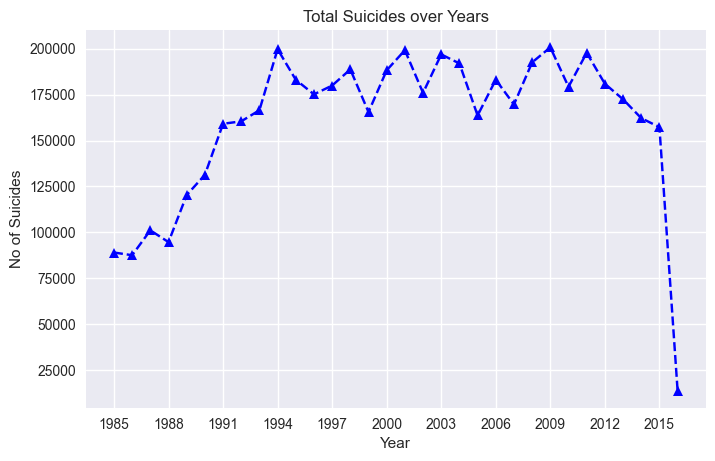

In [1019]:
data = who_data.groupby('year')['SuicidesNo'].sum().reset_index()

x_data = data['year']
y_data = data['SuicidesNo']

# Resize your Graph
plt.figure(figsize=(8,5), dpi=100)

# Plot 
plt.plot(x_data,y_data, 'b^--', label='No of Suicides')


# Add a title
plt.title('Total Suicides over Years')

# X and Y labels
plt.xlabel('Year')
plt.ylabel('No of Suicides')

# X Tickmarks (scale of your graph)
plt.xticks(data.year[::3].tolist())

plt.show()

Conclusions: No of suicides has remained constant over the years

Note:
The disprecancies at both ends (1985 - 1993) and (2015-2016) is mainly because doesnt have the same number of data points as the other years. This is shown in the plot below. They follow a similar trend

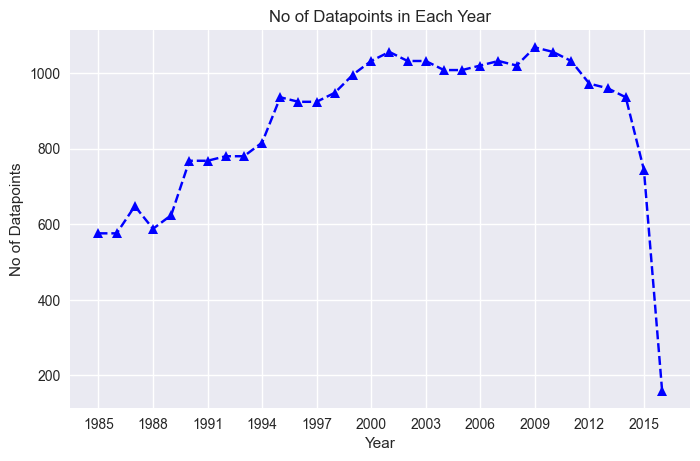

In [1020]:
data_year = who_data['year'].value_counts().sort_index().to_frame().reset_index().rename(columns = {'index':'year','year':'NoOfDatapoints'})

x_g = data_year['year']
y_g = data_year['NoOfDatapoints']

# Resize your Graph
plt.figure(figsize=(8,5), dpi=100)

# Plot 
plt.plot(x_g,y_g, 'b^--')


# Add a title
plt.title('No of Datapoints in Each Year')

# X and Y labels
plt.xlabel('Year')
plt.ylabel('No of Datapoints')

# X Tickmarks (scale of your graph)
plt.xticks(data.year[::3].tolist())

plt.show()

### 11. Suicides by Gender over the years

Unstacking is done to move the innermost row index to become the innermost column index. In this case, year is unstacked to give us a list of columns of years

In [1021]:
group_data = who_data.groupby(['sex','year'])['SuicidesNo'].sum().unstack()
group_data

year,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
sex,,,,,,,,,,,,,,,,,,,,,
female,27115,27606,28454,24807,32757,35529,40109,41820,44239,44539,...,41147,42885,40439,32469,45049,46918,41073,40756,31012,3009
male,61894,59935,72648,69876,87572,95804,119049,118668,122300,155259,...,128541,149722,160343,146842,152789,134039,131411,121478,126305,10785


In [1022]:
female_data = group_data.loc['female',:].reset_index().female
male_data   = group_data.loc['male',:].reset_index().male
year        = group_data.loc['male',:].reset_index().year

Two subplots are made:

    -  First shows the Total number of suicides over the years 1985-2016
    -  Second shows the split on percentage of total deaths based on gender

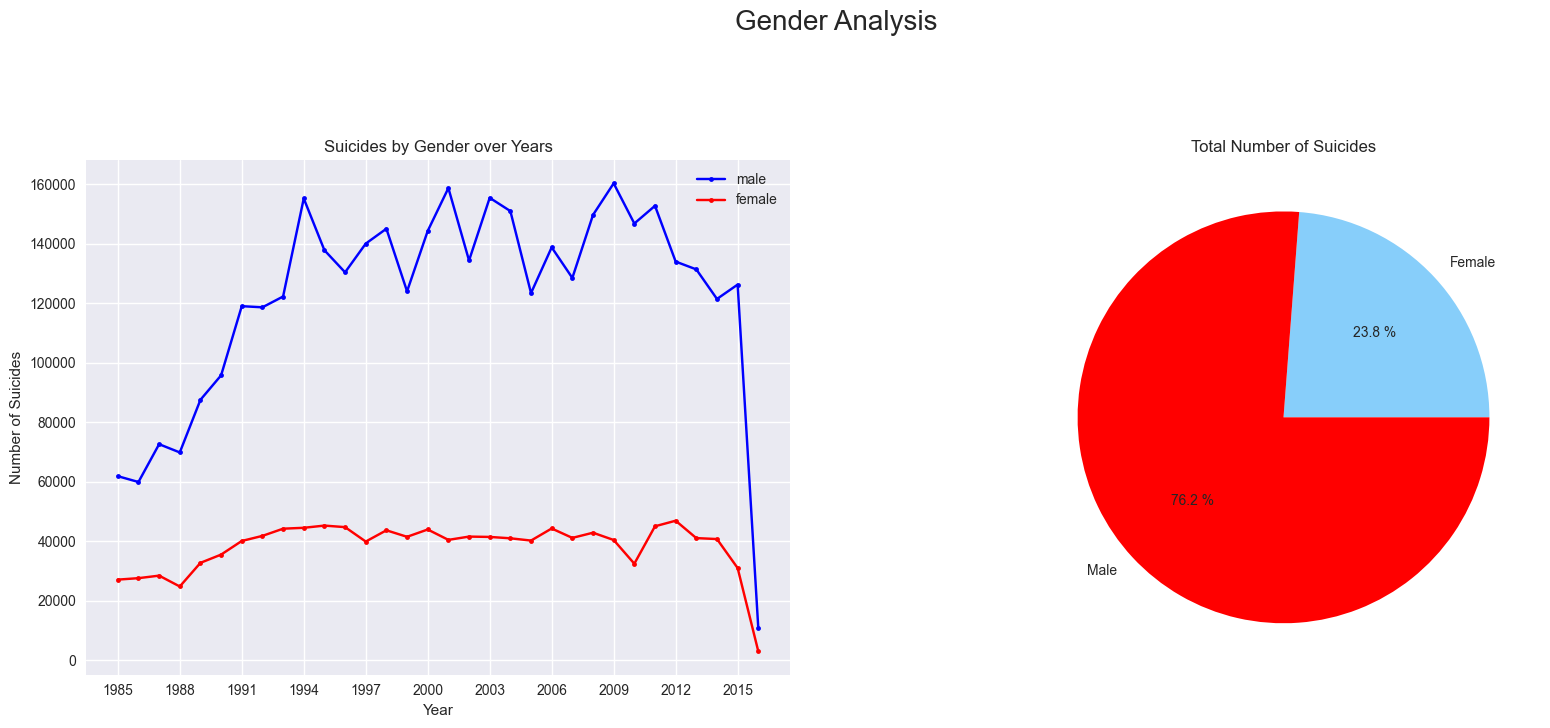

In [1023]:
x_data = data['year']
y_data = data['SuicidesNo']

# Resize your Graph
# plt.figure(figsize=(8,5), dpi=100)
fig = plt.figure(figsize=(20,15), dpi=100)

#Add Global Title to the subplots
fig.suptitle("Gender Analysis", fontsize=20)

# Plot ax1 - Trend lines for Gender Analysis
ax1 = fig.add_subplot(2,2,1)
ax1.plot(year, male_data, 'b.-', label='male')
ax1.plot(year, female_data, 'r.-', label='female')


# Add a title
ax1.set_title('Suicides by Gender over Years')

# X and Y labels
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Suicides')

# X Tickmarks (scale of your graph)
ax1.set_xticks(data.year[::3].tolist())

ax1.legend()

# Plot ax2 -> Pie Chart 
ax2 = fig.add_subplot(2,2,2)
labels = ['Female', 'Male']
colors = ['lightskyblue', 'red'] 
ax2.pie(who_data.groupby('sex')['SuicidesNo'].sum(), labels = labels, colors=colors, autopct='%1.1f %%')
ax2.set_title('Total Number of Suicides')

plt.show()

Conclusions:

1. No of male suicides(76.2%) is greater the female suicides(23.8%) even though the number of females recorded in the dataset is more 1 billion than number of males. This implies the males are more prone to suicide than females
2. No of Male suicides and female suicides follow a similar trend


In [1024]:
# Difference between number of males and females
who_data.groupby('sex')['population'].sum()['female'] - who_data.groupby('sex')['population'].sum()['male']

1223405278

In [1025]:
# who_data.groupby('year')['GDPperCapita'].mean().plot()
# who_data.groupby('year')['HDIForYear'].mean().plot()

### 11. Suicides on Generations and Age Groups

In [1026]:
gen_data = who_data.groupby(['Generation'])['SuicidesNo'].sum().to_frame()
gen_data= gen_data.reindex(['GI Generation','Silent','Boomers', 'Generation X','Millenials', 'Generation Z' ])
gen_data

,SuicidesNo
Generation,
GI Generation,289285
Silent,810826
Boomers,1526080
Generation X,1715219
Millenials,663775
Generation Z,123784


'reindex' is used to reintialize the index to based on the order given. In this case, the order chosen is from oldest to the youngest generation

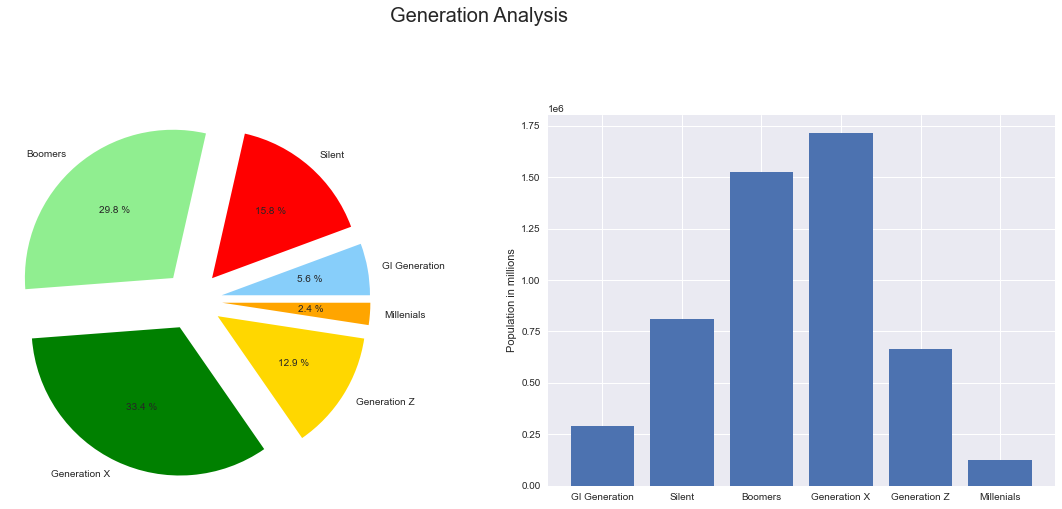

In [1027]:
# Plotting Pie Chart
# values = who_data.groupby(['Generation'])['SuicidesNo'].sum()
values = gen_data.SuicidesNo
fig = plt.figure(figsize=(20,15))

fig.suptitle("Generation Analysis", fontsize=20)

# ax1 - pie plot

ax1 = fig.add_subplot(2,2,1)

labels = ['GI Generation', 'Silent','Boomers', 'Generation X', 'Generation Z', 'Millenials']
colors = ['lightskyblue', 'red', 'lightgreen', 'green', 'gold','orange'] 

ax1.pie(values, labels = labels, colors=colors, autopct='%1.1f %%',explode=[0.2,0.2,0.2,0.2,0.2,0.2])

# ax2 - bar plot

ax2 = fig.add_subplot(2,2,2)

ax2.bar(labels, values)

ax2.set_ylabel('Population in millions')

plt.show()

Conclusion:

1. Generation X has the most suicides (33.4% of the total suicides) amongst all the generations 
2. Generation Z has the least (2.4 % of the total suicides) amongst all the generations

But this doesn't tell us which generation is the most/least prone to suicide. Suicides per 100k of the population is a better indicator as it shows the number of suicides in every 100,000 individuals belonging to that population group. Mean of this variable will help us find the generation most/least prone to suicide

The same computation is done to plot the Mean Suicides per 100k for different generations in a bar graph

In [1028]:
# Calculating Mean Suicides per 100k for every generation

gen_suip100_data = who_data.groupby(['Generation'])['suicidesper100k'].mean().to_frame()
gen_suip100_data = gen_suip100_data.reindex(['GI Generation','Silent','Boomers', 'Generation X', 'Millenials','Generation Z'])
gen_suip100_data

,suicidesper100k
Generation,
GI Generation,22.951003
Silent,16.375431
Boomers,12.508313
Generation X,10.628623
Millenials,5.838143
Generation Z,2.191484


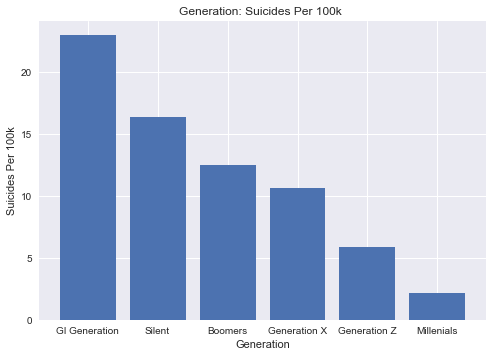

In [1029]:
#Plotting the Mean

values = gen_suip100_data['suicidesper100k']

plt.bar(labels, values)
plt.title('Generation: Suicides Per 100k ')
plt.xlabel('Generation')
plt.ylabel('Suicides Per 100k')
plt.show()


Conclusion: GI Generation are the most prone to suicide whereas the Millenials are the least prone. The decreasing trend observed in the number of suicides from GI Generation to Millenials can't be explained with the given variables.

#### Age Groups

In [1030]:
# Calculating Age Groups per 100k for every generation
age_data = who_data.groupby(['age'])['SuicidesNo'].sum().sort_index()
age_data = age_data.reindex(['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])
age_data

age
5-14 years       46090
15-24 years     642033
25-34 years     879247
35-54 years    1779445
55-74 years    1245424
75+ years       536730
Name: SuicidesNo, dtype: int64

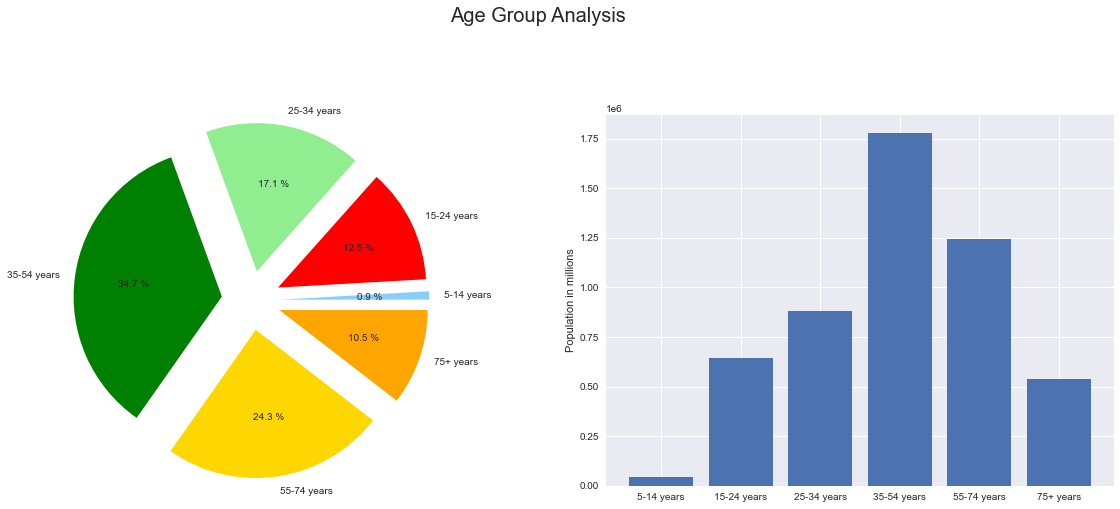

In [1031]:
# Plotting Pie Chart
# values = who_data.groupby(['age'])['SuicidesNo'].sum()
values = age_data
fig = plt.figure(figsize=(20,15))

fig.suptitle("Age Group Analysis", fontsize=20)

# plt.style.use('seaborn')

# fig1, ax1 = plt.subplots()
# fig2, ax2 = plt.subplots()

# ax1 - pie plot

ax1 = fig.add_subplot(2,2,1)

labels = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']
# colors = ['#abcdef', '#aabbcc']

ax1.pie(values, labels = labels, colors=colors, autopct='%1.1f %%',explode=[0.2,0.2,0.2,0.2,0.2,0.2])

# ax1.set_title('Generation Count')


# ax2 - bar plot

ax2 = fig.add_subplot(2,2,2)
ax2.bar(labels, values)

ax2.set_ylabel('Population in millions')

st.set_y(0.95)

plt.show()

Conclusion:

1. 35-54 years age group has the most suicides (34.7% of the total suicides) amongst all the age groups 
2. 5-14 years age group  has the least (0.9 % of the total suicides) amongst all the age groups 

But this doesn't tell us which age groups is the most/least prone to suicide. Suicides per 100k of the population is a better indicator as it shows the number of suicides in every 100,000 individuals belonging to that age group. Mean of this variable will help us find the generation most/least prone to suicide

The same computation is done to plot the Suicides per 100k for different age groups in a bar graph

In [1032]:
# Calculating Mean Suicides per 100k for every age group

age_suip100_data = who_data.groupby(['age'])['suicidesper100k'].mean().to_frame()
age_suip100_data = age_suip100_data.reindex(['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])
age_suip100_data

,suicidesper100k
age,
5-14 years,0.589781
15-24 years,7.614860
25-34 years,10.285327
35-54 years,12.385002
55-74 years,13.515366
75+ years,20.727527


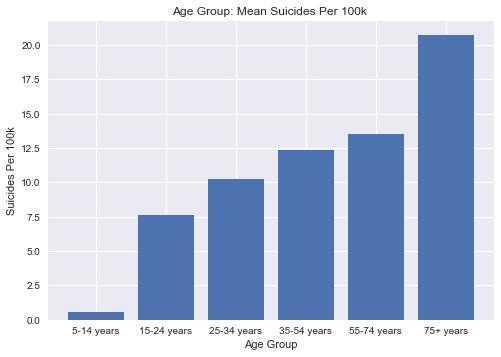

In [1033]:
# Plotting Mean Suicide 

values = age_suip100_data['suicidesper100k']

plt.bar(labels, values)
plt.title('Age Group: Mean Suicides Per 100k ')
plt.xlabel('Age Group')
plt.ylabel('Suicides Per 100k')
plt.show()

The trend followed in the above plot for age group is consistent with generation's

The reason behind the peaks for 'Generation X' and '35-54 years' in the above plots  is because that's the most predominant population group in the countries listed in the dataset. The results which shows the population for every age group and generation highlight this fact

In [1034]:
(who_data.groupby('age')['population'].sum()/10**5).to_frame().rename(columns ={'population':'PopulationIn100k'} )

,PopulationIn100k
age,
15-24 years,86429.46896
25-34 years,84381.03587
35-54 years,143758.88123
5-14 years,83986.93237
55-74 years,88032.45340
75+ years,26632.81253


In [1035]:
(who_data.groupby('Generation')['population'].sum()/10**5).to_frame().rename(columns ={'population':'PopulationIn100k'} )

,PopulationIn100k
Generation,
Boomers,116731.10499
GI Generation,12276.01600
Generation X,159064.28840
Generation Z,56874.55134
Millenials,116257.79091
Silent,52017.83272


#### Write the dataframe to a csv

In [1040]:
who_data.to_csv('who_suicide_data_final_srimukessh.csv',index = 'False')